<a href="https://colab.research.google.com/github/akifkashif/Netflix-Movies-and-TV-shows-Clustering-Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [47]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


In [48]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [216]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [51]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


***There are missing values in columns Director, Cast, Country, Rating***.

In [53]:
df.shape

(7787, 12)

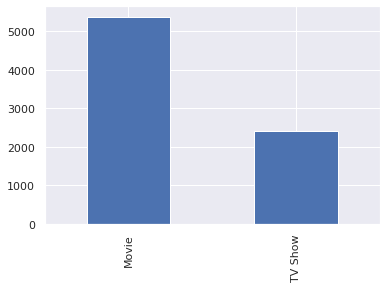

In [54]:
df['type'].value_counts().plot(kind='bar')

***There are more number of movies in Netflix than TVshows.***

In [55]:
df['title'].nunique()

7787

In [56]:

Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates
     

The Dublicate Values in Dataframe: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


***There are no duplicate values in the dataframe.***

In [57]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

***There are null values in director, cast, country, release year, rating columns.***

In [234]:
df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [235]:
df['cast'].fillna(value='No cast',inplace=True)

In [236]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [237]:
df['director'].fillna(value='No director',inplace=True)

In [221]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   date_added    7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
dtypes: int64(1), object(10)
memory usage: 728.4+ KB


In [64]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

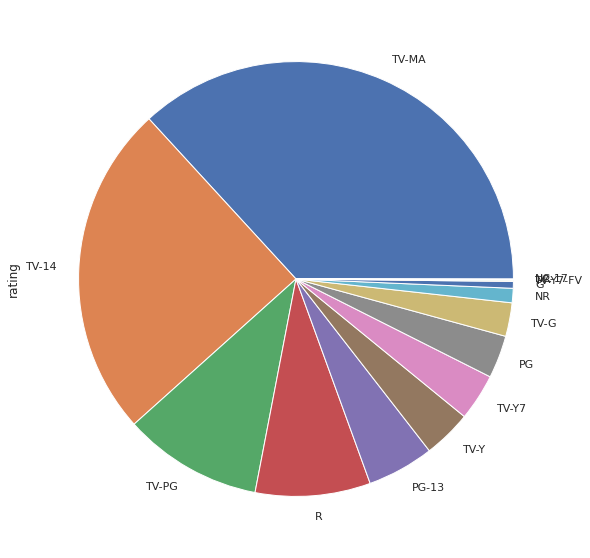

In [65]:
df['rating'].value_counts().plot(kind='pie', figsize = (10,10))

***Highest number of ratings are TV-MA and TV-14 from Movie and TV Show.***

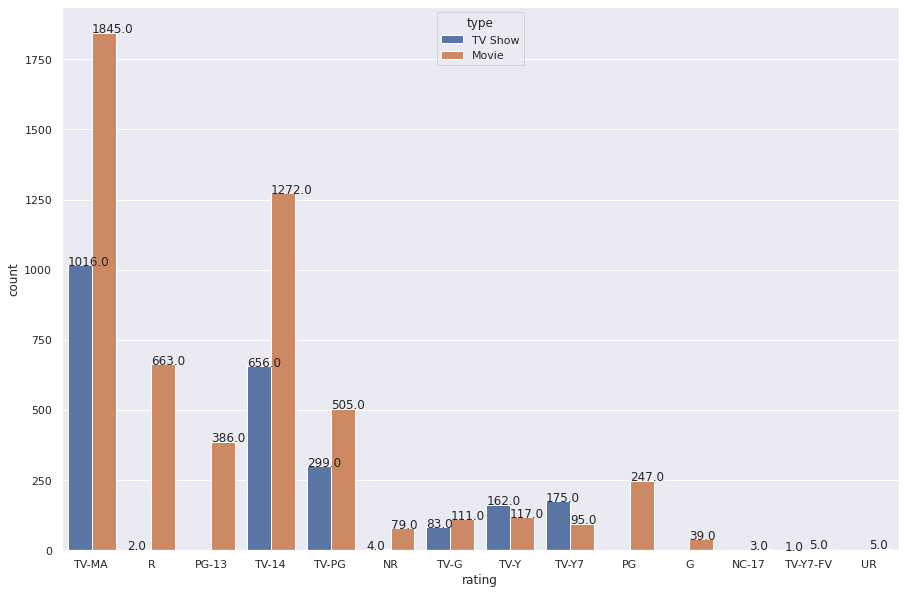

In [66]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'rating', hue = 'type',)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

***There are more TV-MA(Mature Audience) content on Netflix followed by TV-14(14+) and TG-PG(Parental Guidance) compared to other content . There are no TV shows with content based on PG-13, PG, G, UR etc,. These TV Show stats might change in the future where more versatile content will be filmed.***

In [67]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [68]:
df['Audience_AgeGroup']  = df['rating'].apply(lambda x:'Millennials' if x in ['TV-MA','NR','R','UR','NC-17'] else 'GenZ' if x in ['TV-PG','TV-Y7-FV', 'TV-Y7', 'PG','TV-14','PG' ]  else 'Kids')

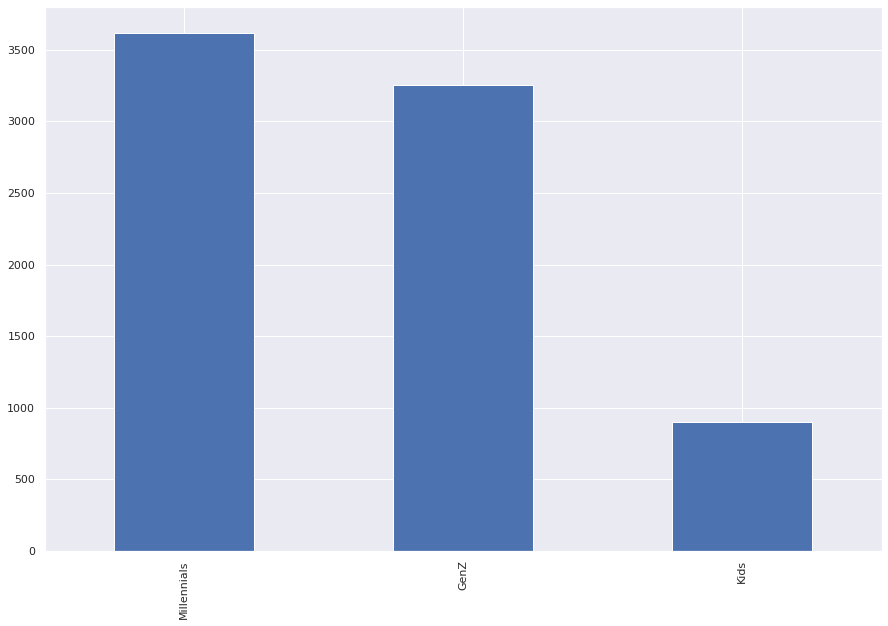

In [122]:
df['Audience_AgeGroup'].value_counts().plot(kind='bar')

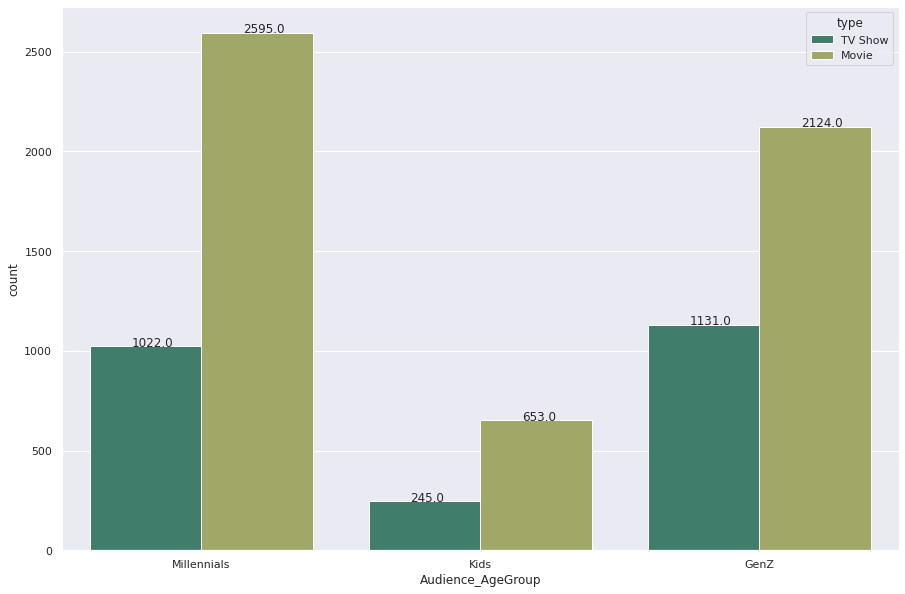

In [120]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(data = df, x = 'Audience_AgeGroup', hue = 'type',palette = 'gist_earth')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

***Netflix has highest content count for individuals of age group Millenials and lowest content for Kids. The database contains wide-reaching number of movies for Millenials and fairly equivalent number of TV Shows for both Millennial and GenZ age groups.***

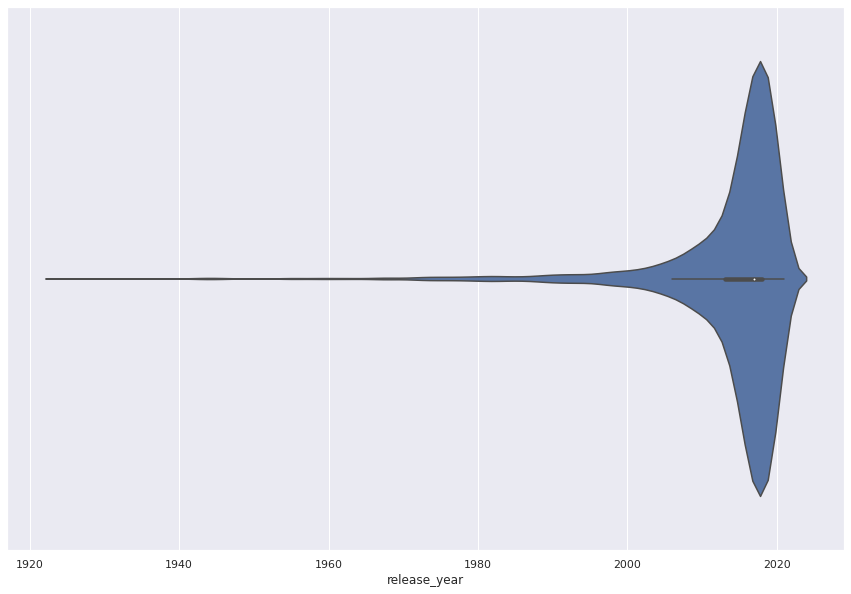

In [71]:
sns.violinplot(data = df, x = 'release_year', hue = 'type')



***1.   Highest Number of movies and TV shows were produced in the years   2015-2019. ***

***2.   Because of the digitization of the world, people are just one click away from streaming content so majority of the audience in these periods were more interested in Netflix so producers preferred to release their content on netflix. ***

***3.   People started taking interest in OTT platforms from 2017 and as Netflix is the largest OTT services provider so theres a peak from that period.***



In [72]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Audience_AgeGroup
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Millennials
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Millennials
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Millennials
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Kids
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Kids


In [73]:
df.country.value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

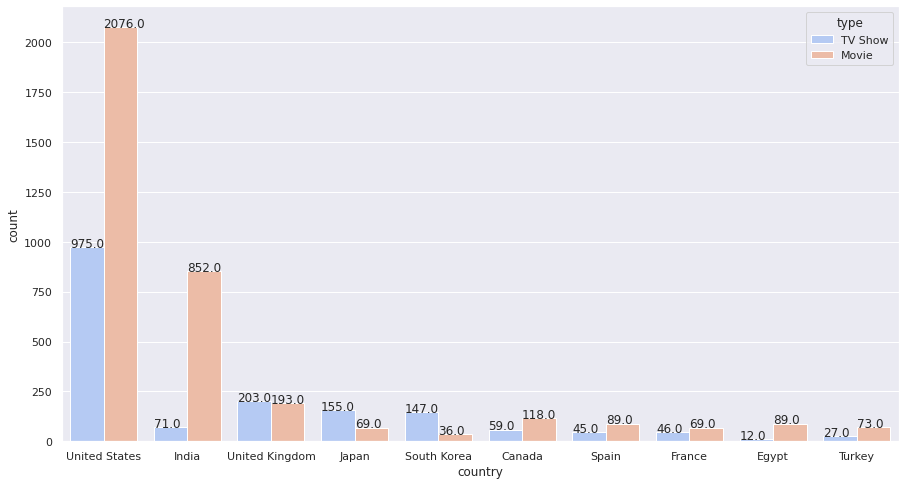

In [83]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df, x='country',palette="coolwarm",order=df['country'].value_counts().index[0:10],hue='type', )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

***This countplot shows that the country US has significant amount of both movies and TV shows at netflix and coming at second place, India has an inconsistent distribution between movie and TV show with movie being higher.***

In [75]:
#Extracting month from date added column in the dataset
df['month'] = pd.DatetimeIndex(df['date_added']).month


In [76]:
#COnverting month number to month name
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

(array([], dtype=int64),)

In [177]:
df1.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Audience_AgeGroup,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Millennials,Aug
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Millennials,Dec
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Millennials,Dec
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Kids,Nov
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Kids,Jan


In [86]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


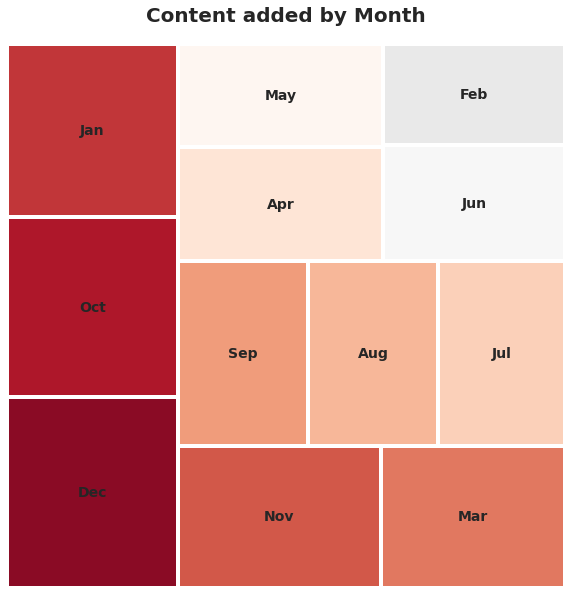

In [89]:
# Making a TreeMap
import squarify
y = df.month.value_counts()
fig = plt.figure(figsize = (10,10))
squarify.plot(sizes = y.values , label = y.index , color = sns.color_palette('RdGy' , n_colors = 20),
             linewidth = 4 , text_kwargs = {'fontsize' : 14 , 'fontweight' : 'bold'})
plt.title('Content added by Month' , position = (0.5 , 1.0 + 0.03) , fontsize = '20' , fontweight = 'bold')
plt.axis('off')
plt.show()

***December was the month were the most amount of content was added on Netflix followed by October***.

In [133]:

df.duration.value_counts().to_frame()

,duration
1 Season,1606
2 Seasons,378
3 Seasons,183
90 min,136
93 min,131
...,...
182 min,1
224 min,1
37 min,1
233 min,1


Research says that the average duration of a single episode of Netflix is 55 minutes and the average number of episodes in a single season of a show is 10.

In [ ]:
for x.index in df1.duration.values:
  print(x)


In [173]:
550*4

2200

In [159]:
df1 = df.copy()

In [162]:
df1.duration.values

array(['4 Seasons', '93 min', '78 min', ..., '44 min', '1 Season',
       '90 min'], dtype=object)

In [ ]:
#we need to convert the season values of type TV Show into number of minutes
df1['duration'] = df1['duration'].apply(lambda x: int(x[0])*550 if 'Seasons' in str(df1.duration.values) else int(x[0])*550 if 'Season' in str(df1.duration.values))


In [183]:
df_country = df.groupby('rating').count()['country']

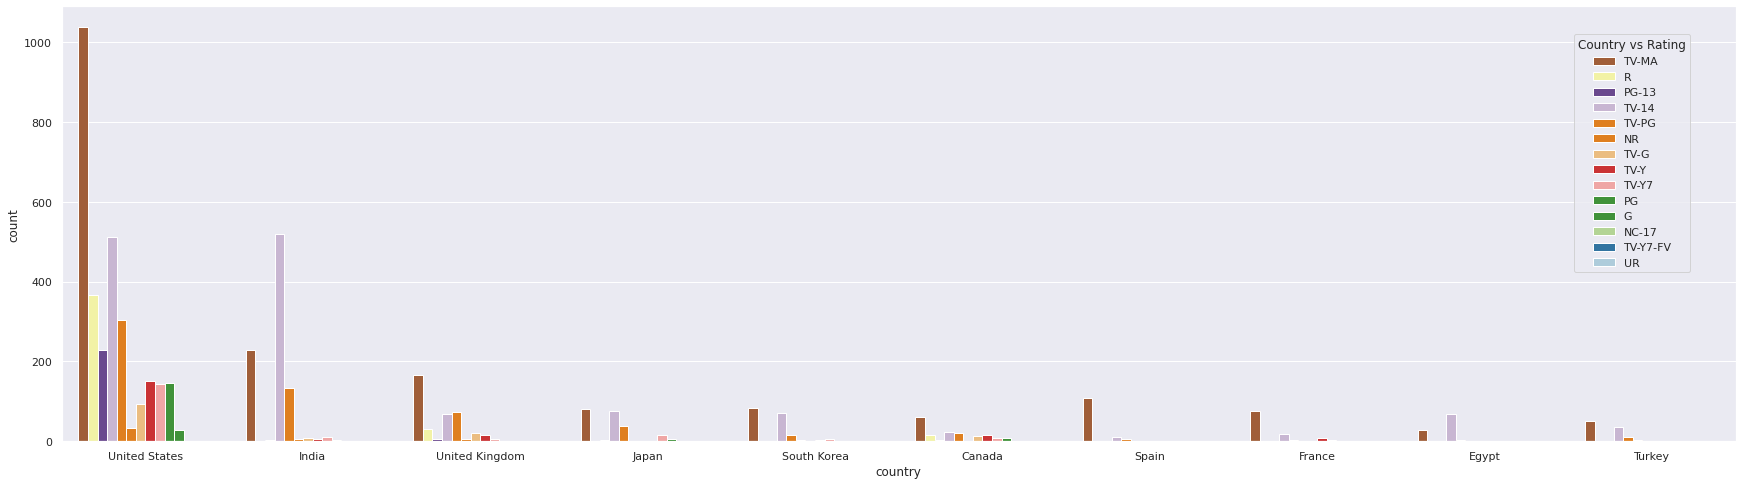

In [209]:

sns.set(rc={'figure.figsize':(30,8)})
g = sns.countplot(data = df, x='country',palette="Paired_r",order=df['country'].value_counts().index[0:10],hue = 'rating', )
sns.move_legend(g, "upper left", bbox_to_anchor=(.90, .95), title='Country vs Rating')

In [222]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Here we can see the distribution of content is highest in US reason being there are myriad of cultures thats why US produces variety of content on Netflix. As the total content count of a country decreases, the range of content cease to exist.

In [250]:
df.director.value_counts().to_frame()

,director
No director,2376
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
...,...
Charles Officer,1
John Trengove,1
Jonathan Helpert,1
Jacob Schwab,1


In [258]:
df2 = df.copy()

In [259]:
df2.dropna(subset =(['director']), inplace =  True )

Text(0.5, 1.0, 'Ratings with respect to Directors')

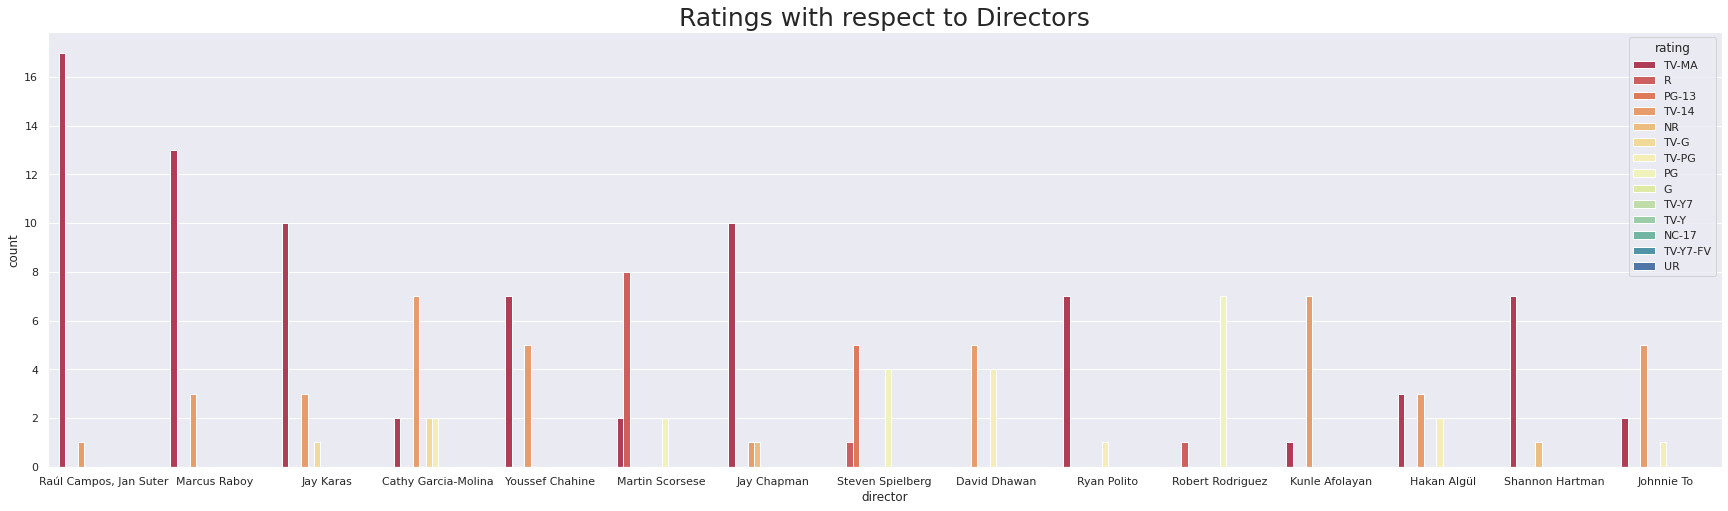

In [284]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(data = df2, x='director',palette="Spectral",order=df['director'].value_counts().index[0:15],hue='rating')
plt.title('Ratings with respect to Directors',fontsize = 25  )

***Majority of directors had their content rated as TV-MA(Mature Audience). As directors specialize in specific type of content, there aren't many directors who produce Movies or TV Shows with multiple ratings. ***